In [1]:
# plot imports
import pyvista as pv
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from skimage.io import imread
from skimage.color import rgb2lab
from lc_tda.plot import rcparams, format_axis

# sklearn imports
from sklearn.preprocessing import StandardScaler

# scipy imports
from scipy.ndimage import zoom

# other imports
import glob
import pickle
import numpy as np
from lc_tda.topology import minkowski, fractal_minkowski

# format figures
rcparams(1)

# define color cycle
COLOR = ['#515151', '#df5048', '#3370d8', '#5baa71',
         '#a87bd8', '#c49b33', '#5bc8ca', '#76504f',
         '#8e8c2b', '#ea6f2d', '#7099c8', '#80b537']


### 1. Dataset TDA

Corresponding to Figure 4.


In [2]:
def gray_image(file='../image/dataset_tda/o3_5.png'):
    """A function to convert rgb image to grayscale.

    Args:
        file (str, optional): image name. Defaults to '../image/dataset_tda/o3_5.png'.

    Returns:
        np.array: grayscale image
    """
    # read image
    img = imread(file)
    img = img[..., :3] / 255  # ignore the last channel of opacity

    dx, dy, dz = img.shape
    img = zoom(img, zoom=(150/dx, 150/dy, 1))  # reshape the image to 150x150
    img = img.mean(axis=-1)  # convert to grayscale
    return img


In [4]:
# read all images
files = sorted(glob.glob('../image/dataset_tda/*.png'))

img = []
for file in files:
    img_ = gray_image(file)
    img.append(img_)

# reorganize image orders
img = np.array(img)[[2, 0, 3, 4, 5, 1]]
files = np.array(files)[[2, 0, 3, 4, 5, 1]]


In [5]:
# EC curves for each grayscale image
threshold = np.linspace(-4, 4, 100)

ec = []
for i in range(len(img)):
    img_ = img[i]
    ss = StandardScaler()
    img_ = ss.fit_transform(img_)
    m = minkowski(img_, threshold)
    ec_ = m[..., 2]
    ec_ = np.convolve(ec_, np.ones(10)/10, mode='same')  # smooth the curve
    ec.append(ec_)

ec = np.array(ec)
ec /= np.abs(ec).max()  # normalize the curve


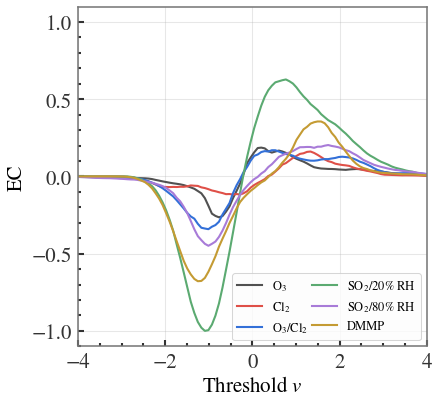

In [6]:
# plot figrue
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(threshold, ec[0], label='O$_3$')
ax.plot(threshold, ec[1], label='Cl$_2$')
ax.plot(threshold, ec[2], label='O$_3$/Cl$_2$')
ax.plot(threshold, ec[3], label='SO$_2$/20% RH')
ax.plot(threshold, ec[4], label='SO$_2$/80% RH')
ax.plot(threshold, ec[5], label='DMMP')
ax.set_xlim([-4, 4])
ax.set_ylim([-1.1, 1.1])
ax.legend(ncol=2, columnspacing=0.3, loc=4, fontsize=12)
# ax.grid()
ax.set_xlabel('Threshold $v$')
ax.set_ylabel('EC')
format_axis(ax)
plt.savefig(f'../image/dataset_tda/dataset_tda.png',
            dpi=300, bbox_inches='tight', transparent=True)


### 2. Color Channel TDA

Corresponding to Figure 5.


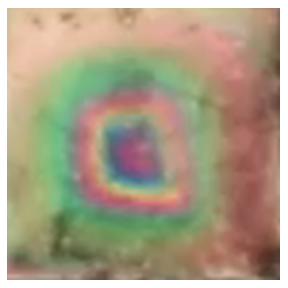

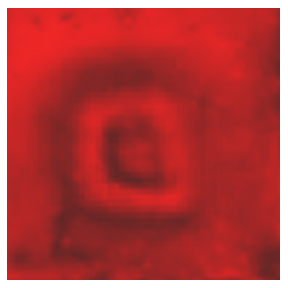

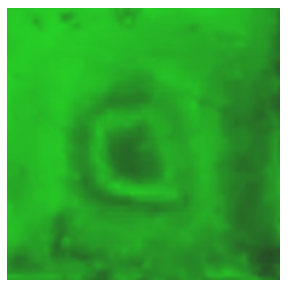

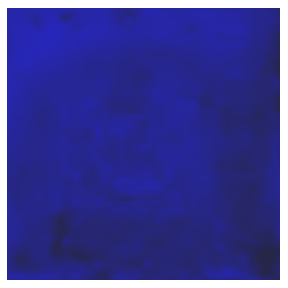

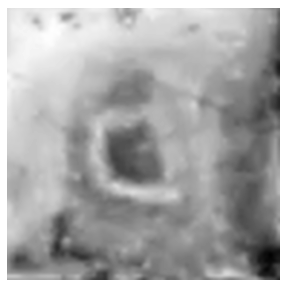

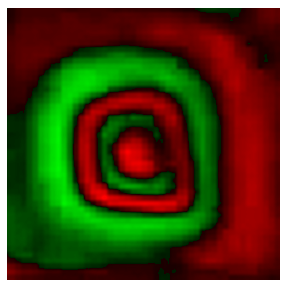

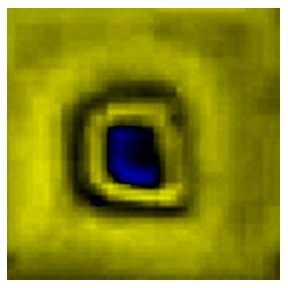

In [92]:
file = '../image/dataset_tda/cl2_5.png'
file_name = 'cl2_5'
img = imread(file)

# remove some edges for better 3D visualization
img = img[5:197, 5:197, :3] / 255
dx, dy, dz = img.shape
img = zoom(img, zoom=(150/dx, 150/dy, 1))

# rgb image
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(img, interpolation='bicubic')
ax.axis('off')
plt.tight_layout()
plt.savefig(f'../image/color_tda/{file_name}_rgb.png',
            dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# red, green and blue channels
color_channels = ['red', 'green', 'blue']

for i, c in enumerate(color_channels):
    img_temp = np.zeros_like(img)
    img_temp[..., i] = img[..., i] / 1.2
    img_temp += np.ones_like(img) * 0.15

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(img_temp, interpolation='bicubic')
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(f'../image/color_tda/{file_name}_{c}.svg',
                dpi=300, bbox_inches='tight', transparent=True)
    plt.show()


# L*, A*, B* channels
img_lab = rgb2lab(img)

# L*
img_temp = img_lab[..., 0]
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(img_temp, cmap='gray', interpolation='bicubic')
ax.axis('off')
plt.tight_layout()
plt.savefig(f'../image/color_tda/{file_name}_l.png',
            dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# A*
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.5, 0.0, 0.1),
                 (1.0, 1.0, 1.0)),

         'blue': ((0.0, 0.0, 0.0),
                  (1.0, 0.0, 0.0)),

         'green': ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
         }
red_green = LinearSegmentedColormap('red_green', cdict)

img_temp = img_lab[..., 1]
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(img_temp, cmap=red_green, vmin=-
          40, vmax=40, interpolation='bicubic')
ax.axis('off')
plt.tight_layout()
plt.savefig(f'../image/color_tda/{file_name}_a.png',
            dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# B*
cdict = {'blue': ((0.0, 1.0, 1.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0)),

         'red': ((0.0, 0.0, 0.0),
                 (0.5, 0.0, 0.0),
                 (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 1.0, 1.0))
         }
yellow_blue = LinearSegmentedColormap('yellow_blue', cdict)

img_temp = img_lab[..., 2]
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(img_temp, cmap=yellow_blue, vmin=-
          35, vmax=35, interpolation='bicubic')
ax.axis('off')
plt.tight_layout()
# plt.savefig(f'../image/color_tda/{file_name}_b.png',
#             dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [9]:
# EC curve for each color channel
threshold = np.linspace(-4, 4, 100)

ec = []
for i in range(3):
    img_ = img[..., i]
    ss = StandardScaler()
    img_ = ss.fit_transform(img_)
    m = minkowski(img_, threshold)
    ec_ = m[..., 2]
    ec_ = np.convolve(ec_, np.ones(10)/10, mode='same')
    ec.append(ec_)

for i in range(3):
    img_ = img_lab[..., i]
    ss = StandardScaler()
    img_ = ss.fit_transform(img_)
    m = minkowski(img_, threshold)
    ec_ = m[..., 2]
    ec_ = np.convolve(ec_, np.ones(10)/10, mode='same')
    ec.append(ec_)

ec = np.array(ec)
ec /= np.abs(ec).max()


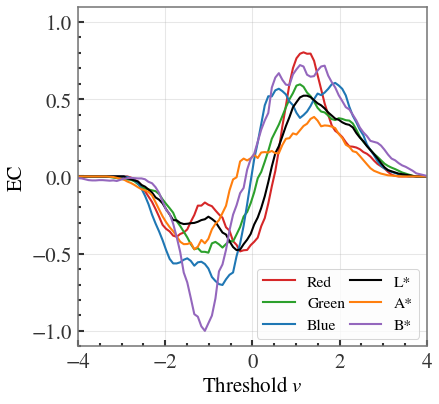

In [10]:
# plot EC curves

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(threshold, ec[0], c='tab:red', label='Red')
ax.plot(threshold, ec[1], c='tab:green', label='Green')
ax.plot(threshold, ec[2], c='tab:blue', label='Blue')
ax.plot(threshold, ec[3], label='L*', c='k')
ax.plot(threshold, ec[4], label='A*', c='tab:orange')
ax.plot(threshold, ec[5], label='B*', c='tab:purple')
ax.set_xlim([-4, 4])
ax.set_ylim([-1.1, 1.1])
ax.legend(loc=4, ncol=2, columnspacing=0.3)
ax.set_xlabel('Threshold $v$')
ax.set_ylabel('EC')
format_axis(ax)

plt.savefig(f'../image/color_tda/color_tda.png',
            dpi=300, bbox_inches='tight', transparent=True)


### 3. Space-Time TDA

Corresponding to Figure 6.


In [94]:
# load an example video
with open('../data/o3cl2/video.pickle', 'rb') as handle:
    x = pickle.load(handle)
    y = pickle.load(handle)

x = x[119]  # remove some no-response region for better visualization
y = y[119]

print(f'{y[0]} ppm O3, {y[1]} ppm Cl2')


1.5 ppm O3, 2.0 ppm Cl2


In [104]:
# extract topological descriptor curves from space-time filtration
# grayscale; cut the first 45 seconds for simpler visualization
x_temp = x[90:].mean(axis=-1)
x_temp -= x_temp.mean()  # normalization
x_temp /= x_temp.std()

thresholds = np.linspace(-4, 4, 100)

mk = minkowski(x_temp, thresholds)
fm = fractal_minkowski(x_temp, thresholds)

/Users/sjiang87/ML/LC_TDA/lc_tda/topology.py:61: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)


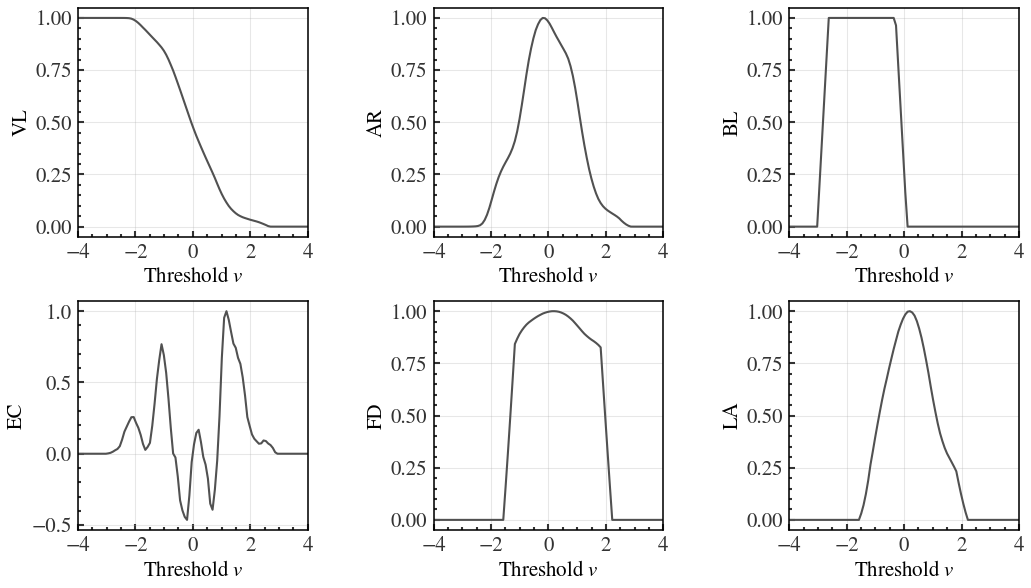

In [105]:
# plot topological descriptor curves
fig, ax = plt.subplots(figsize=(16, 8), ncols=3, nrows=2, tight_layout=True)
ax = ax.ravel()

total = np.concatenate((mk, fm), axis=1)

NAMES = ['VL', 'AR', 'BL', 'EC', 'FD', 'LA']
for i in range(6):
    a = total[:, i]
    if i != 0:# and i != 2:
    # if i == 3:
        a = np.convolve(a, np.ones(5)/5, mode='same')

    a /= np.abs(a).max()
    ax[i].plot(thresholds, a)
    ax[i].set_xlim([-4, 4])
    ax[i].set_xlabel('Threshold $v$')
    ax[i].set_ylabel(NAMES[i])
    ax[i].set_aspect(1.0/ax[i].get_data_ratio(), adjustable='box')
    format_axis(ax[i])

plt.savefig(f'../image/space_time_tda/space_time_tda.png',
            dpi=300, bbox_inches='tight', transparent=True)


In [ ]:
# load an example video
with open('../data/o3cl2/video.pickle', 'rb') as handle:
    x = pickle.load(handle)
    y = pickle.load(handle)

x = x[119]  # remove some no-response region for better visualization
y = y[119]

print(f'{y[0]} ppm O3, {y[1]} ppm Cl2')


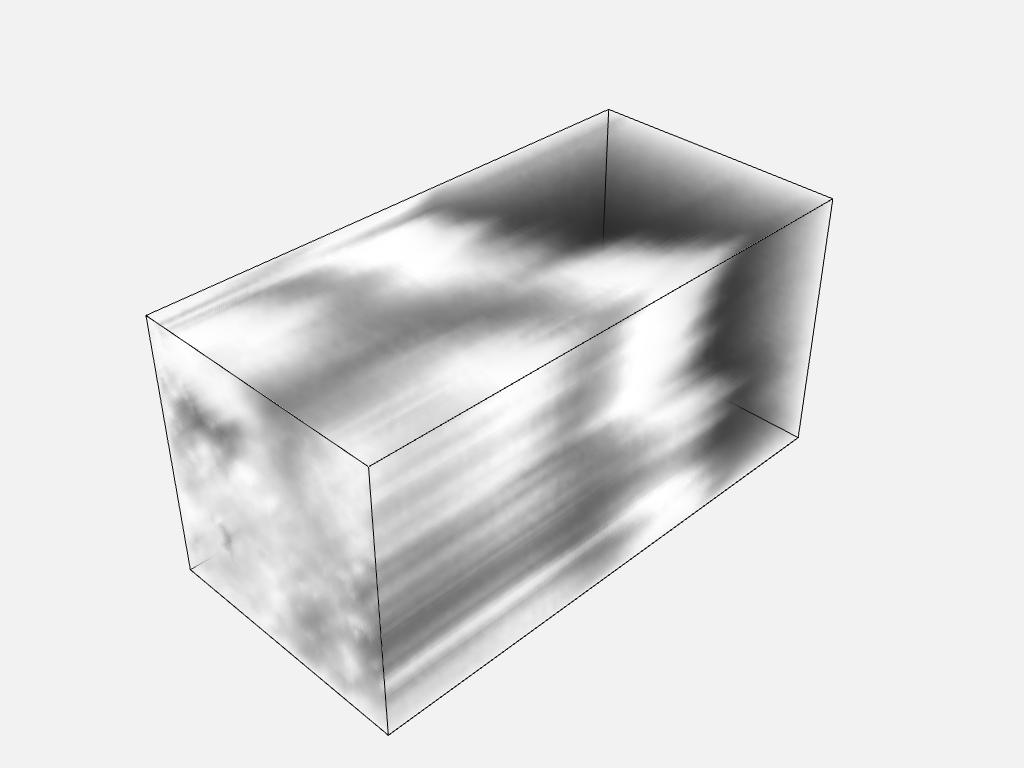

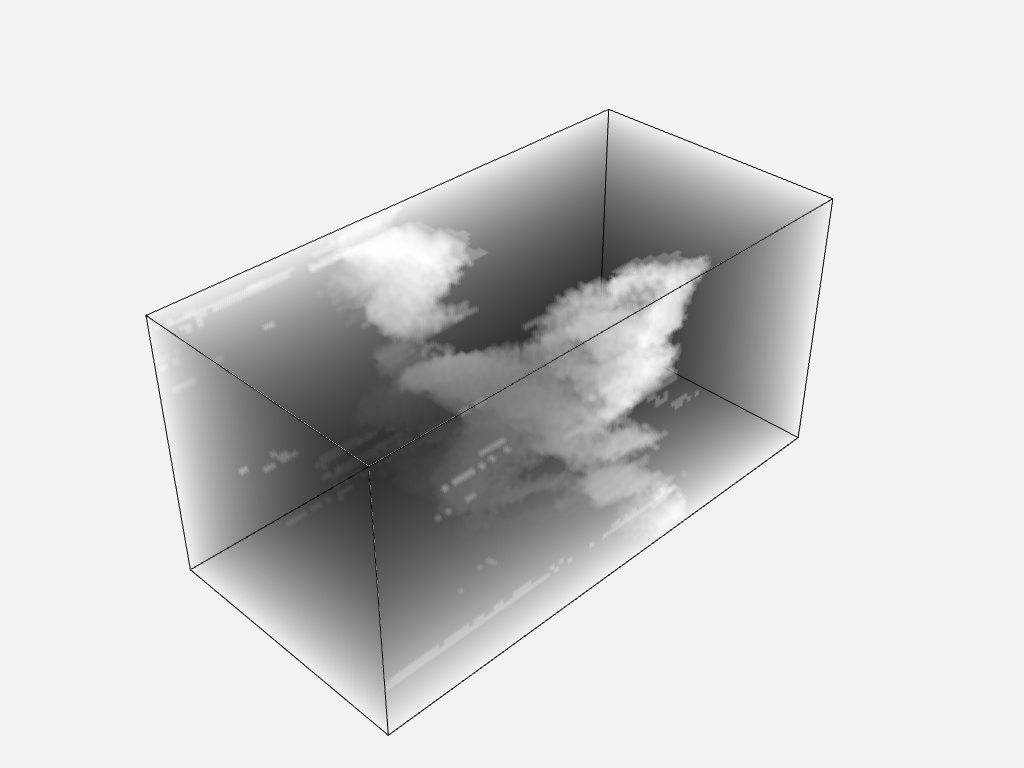

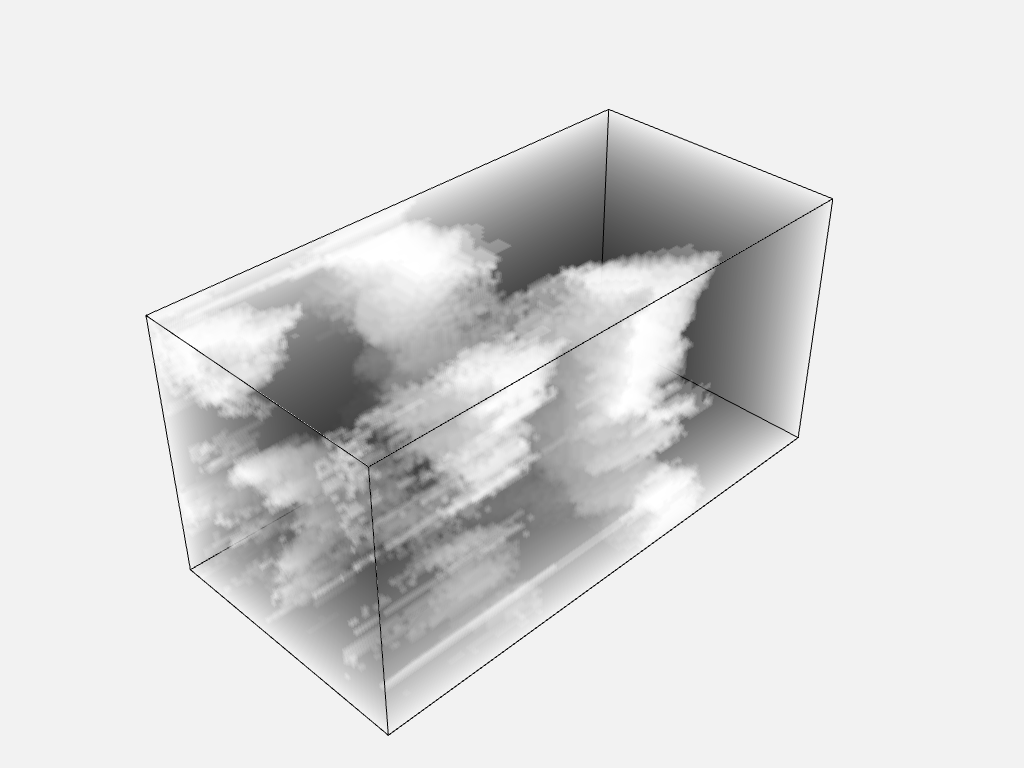

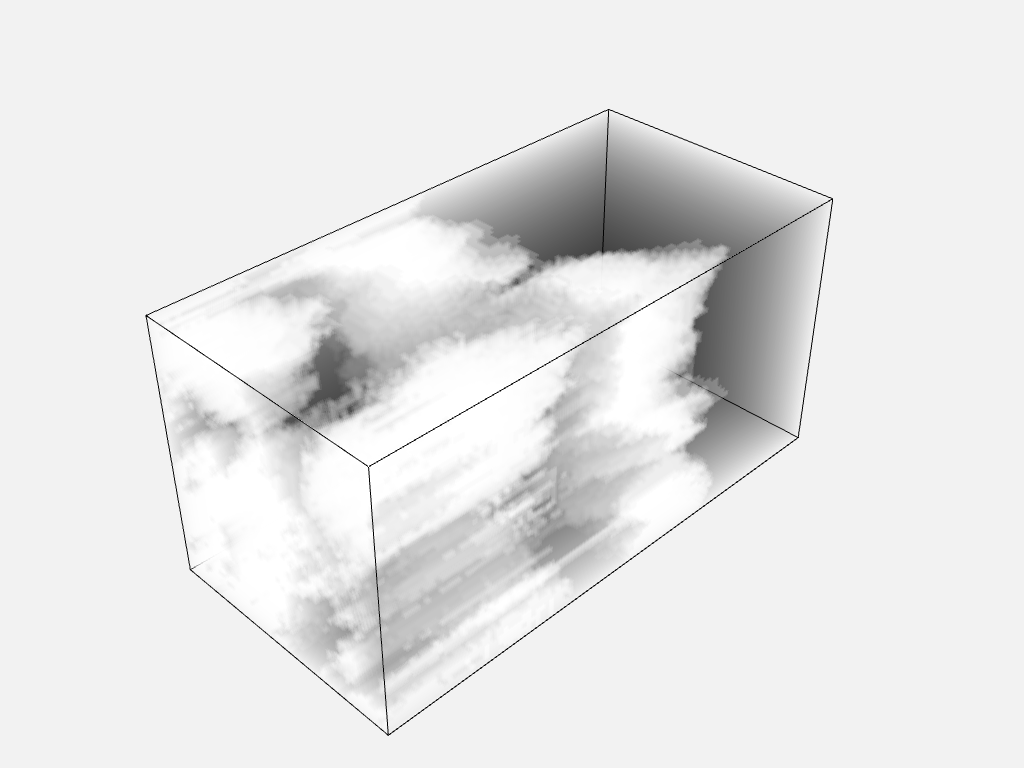

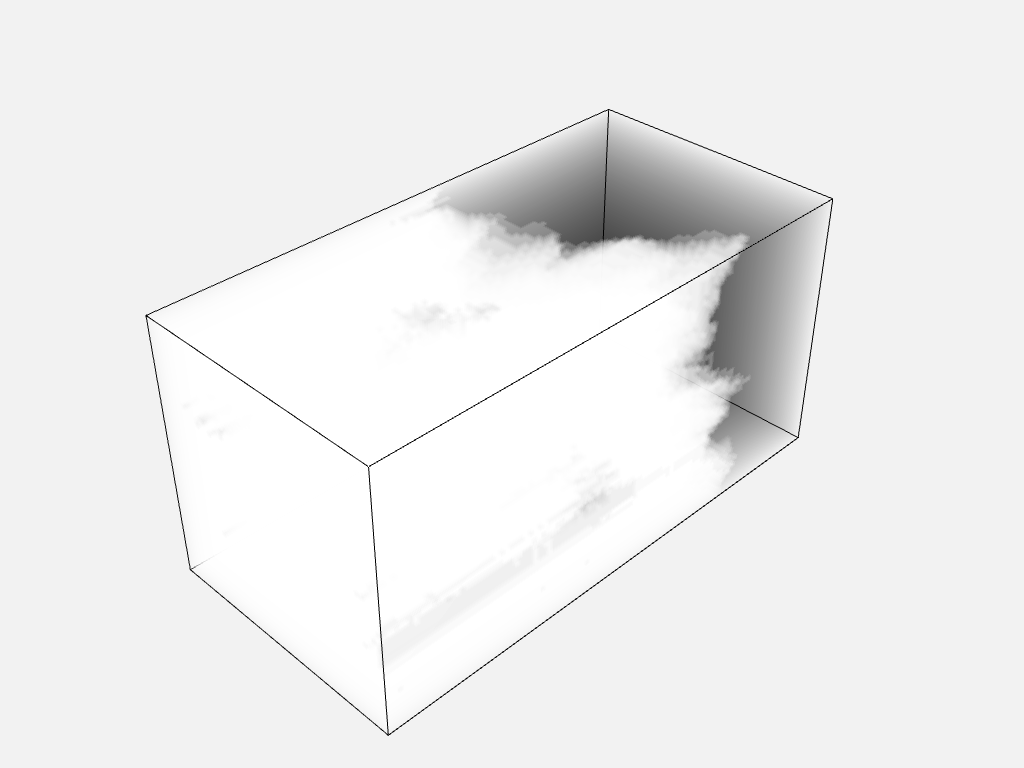

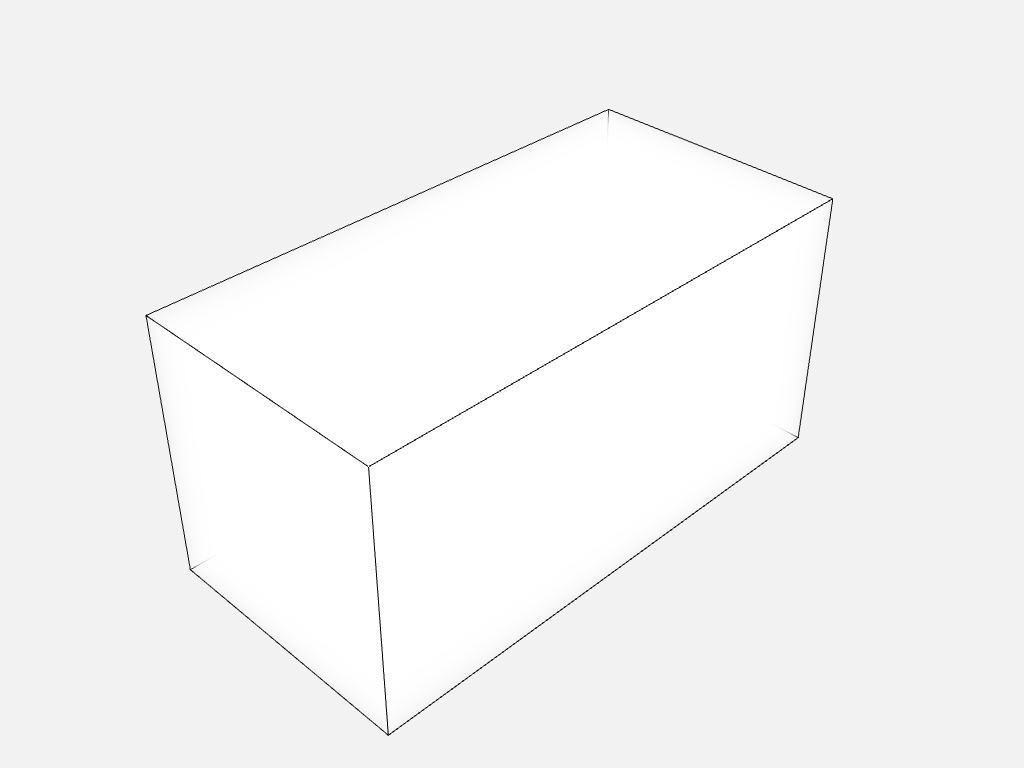

In [74]:
top = []
for i in [None, 300, 250, 200, 100, 0]:
    x_ = x[50:].mean(axis=-1)
    x_ -= x_.min()
    x_ /= x_.max()
    x_ *= 400

    if i != None:
        x_[x_ >= i] = 400
        x_[x_ < i] = 0

    opa = np.ones(256) * 100
    opa[:128] = np.linspace(10, 100, 128)

    data = pv.wrap(x_)
    plotter = pv.Plotter()
    plotter.set_background([0.95, 0.95, 0.95])
    plotter.add_volume(data, cmap='gray', show_scalar_bar=False, opacity=opa)
    plotter.add_mesh(data.outline(), color="k")
    plotter.show()

    top.append(plotter.image)


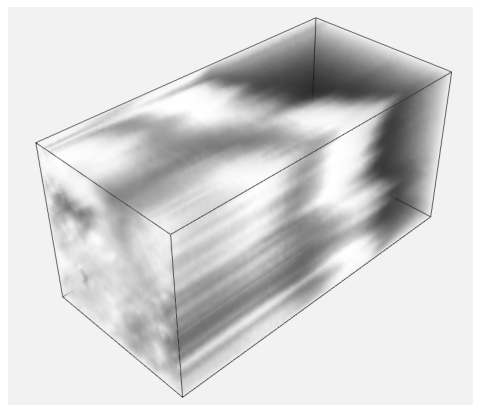

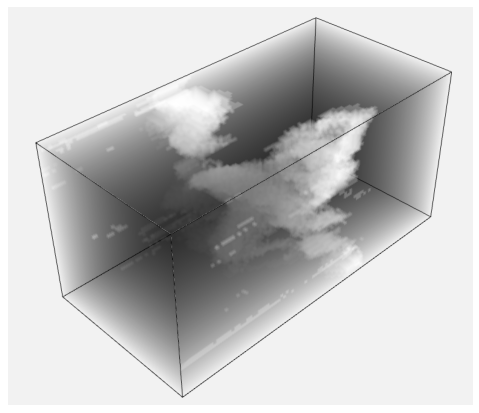

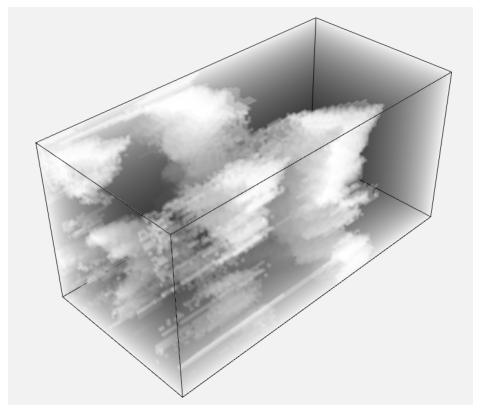

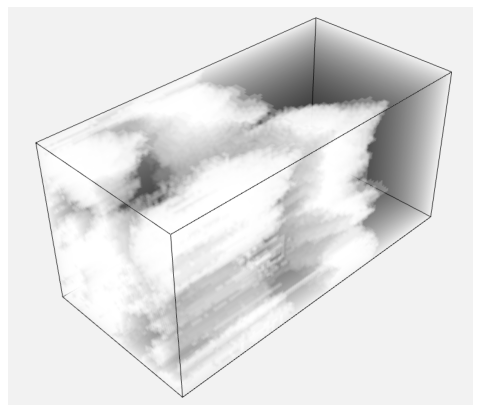

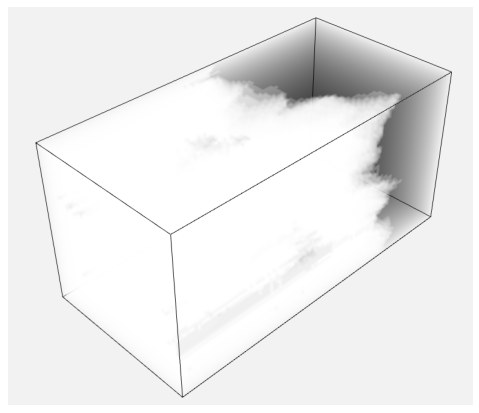

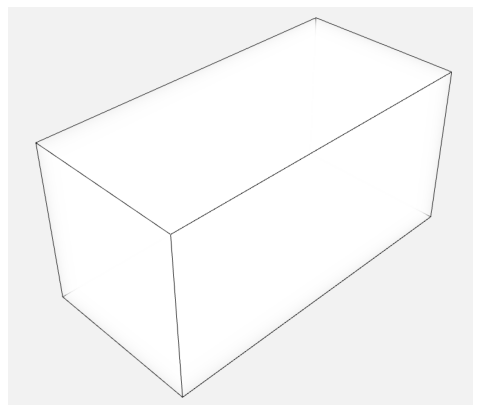

In [75]:
for i in range(len(top)):
    fig, ax = plt.subplots()
    ax.imshow(top[i][90:748, 100:868, :])
    ax.axis('off')
#     plt.savefig(
#         f'../image/space_time_tda/space_time_grayscale_topology_{i}.png', bbox_inches='tight', dpi=300)


In [76]:
# A* space-time topology
x_ = rgb2lab(x)[50:, ..., 1]
x_ -= x_.min()
x_ /= x_.max()
x_ *= 300

a = np.linspace(100, 10, 113)
b = np.linspace(10, 100, 143)
opa = np.concatenate([a, b])


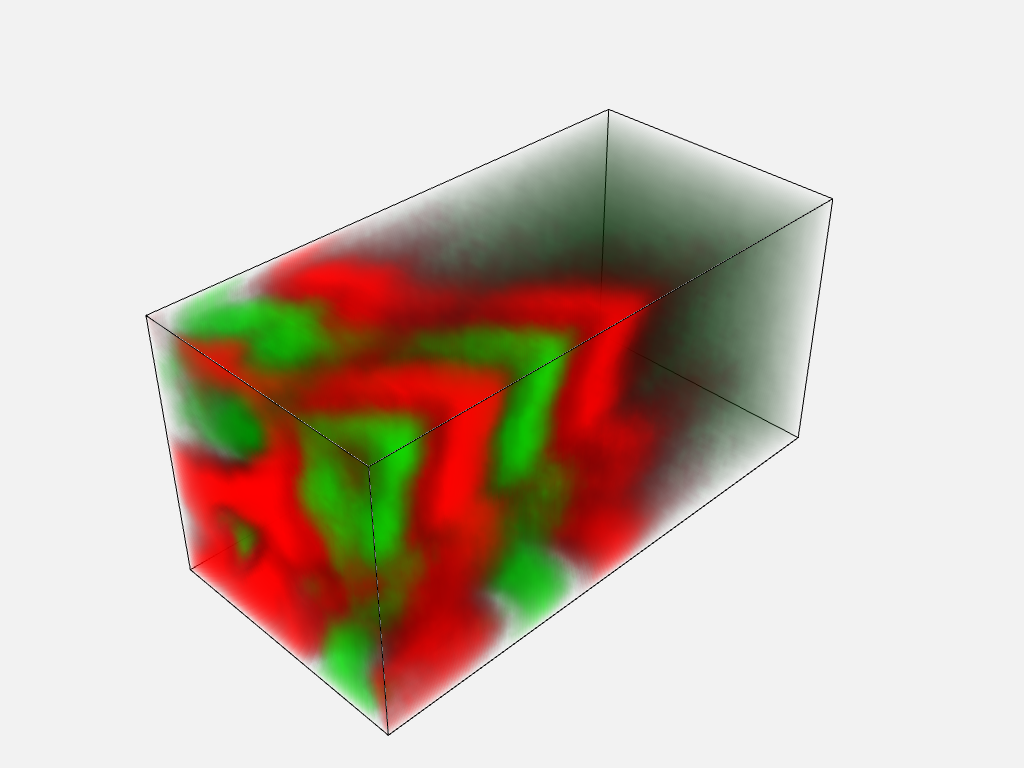

In [77]:
data = pv.wrap(x_)

plotter = pv.Plotter()
plotter.set_background([0.95, 0.95, 0.95])
plotter.add_volume(data, cmap=red_green, show_scalar_bar=False, opacity=opa)
plotter.add_mesh(data.outline(), color="k")
plotter.show()


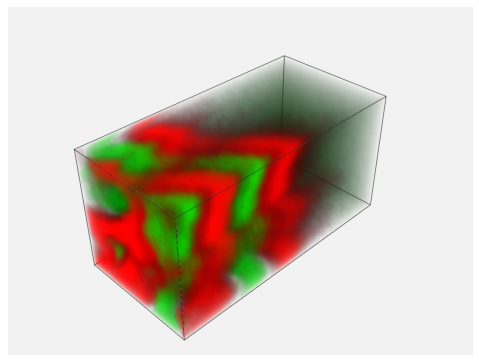

In [9]:
fig, ax = plt.subplots()
ax.imshow(plotter.image)
ax.axis('off')
plt.savefig(f'../image/space_time_tda/space_time_A_topology.png',
            bbox_inches='tight', dpi=300)


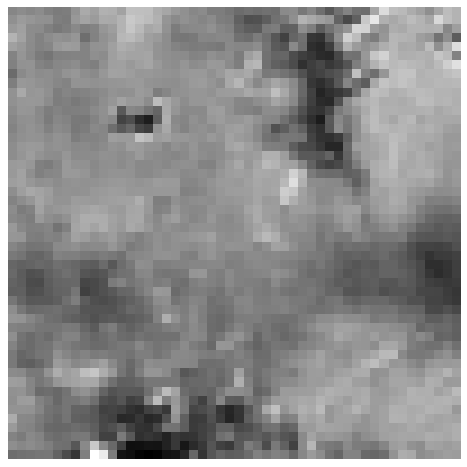

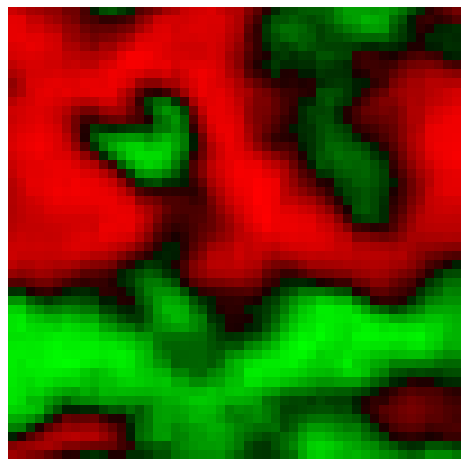

In [11]:
# endpoint images for grayscale and A*
x_ = x[-1].mean(axis=-1)
fig, ax = plt.subplots()
ax.imshow(x_, cmap='gray')
ax.axis('off')
plt.savefig(f'../image/space_time_tda/endpoint_gray.png',
            bbox_inches='tight', dpi=300)

x_ = rgb2lab(x[-1])[..., 1]
fig, ax = plt.subplots()
ax.imshow(x_, cmap=red_green)
ax.axis('off')
plt.savefig(f'../image/space_time_tda/endpoint_A.png',
            bbox_inches='tight', dpi=300)
